In [2]:
import pandas  as pd
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
toyota = pd.read_csv("ToyotaCorolla.csv" ,encoding = 'ISO-8859-1')
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# As per  Question We have to consider only these Columns i.e. 
##### "Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"

In [4]:
for col in toyota.columns:
    print(col) #38 columns so we have to drop 38-9=29 columns

Id
Model
Price
Age_08_04
Mfg_Month
Mfg_Year
KM
Fuel_Type
HP
Met_Color
Color
Automatic
cc
Doors
Cylinders
Gears
Quarterly_Tax
Weight
Mfr_Guarantee
BOVAG_Guarantee
Guarantee_Period
ABS
Airbag_1
Airbag_2
Airco
Automatic_airco
Boardcomputer
CD_Player
Central_Lock
Powered_Windows
Power_Steering
Radio
Mistlamps
Sport_Model
Backseat_Divider
Metallic_Rim
Radio_cassette
Tow_Bar


In [5]:
df = toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [6]:
print(df.head())
df.shape

   Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170


(1436, 9)

<AxesSubplot:>

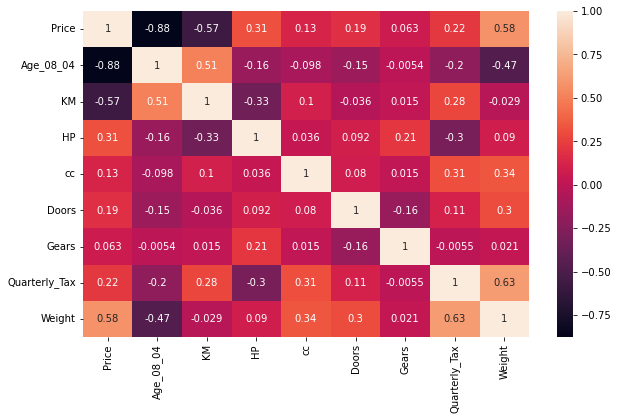

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

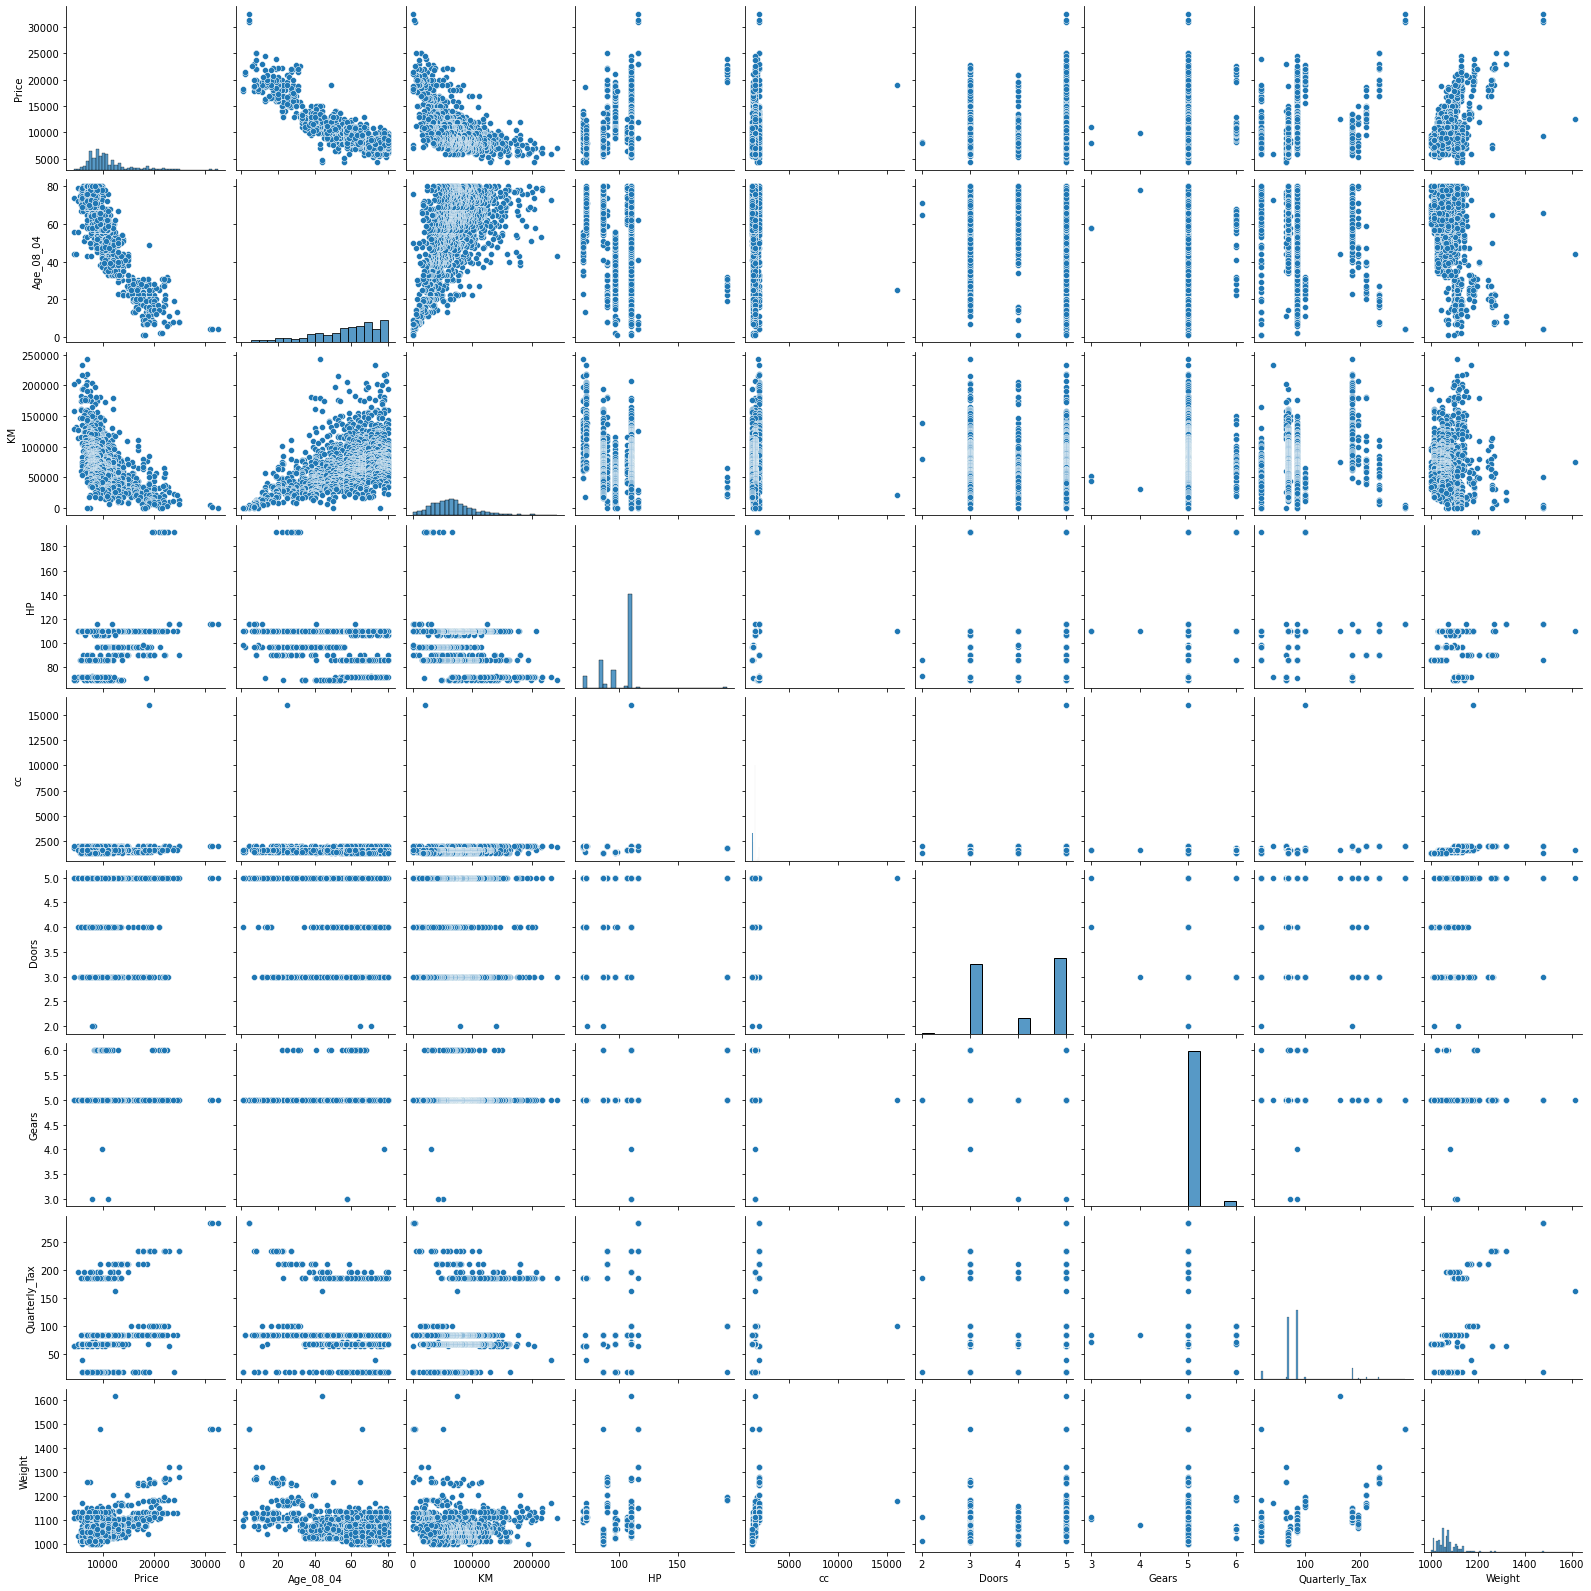

In [8]:
sns.pairplot(df)

# Performing EDA on df:-

In [9]:
df.info()# No Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [10]:
df[df.duplicated()] # one Duplicate.

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [11]:
df1 = df.drop_duplicates()
df1.shape # Before 1 row droped i.e.113

(1435, 9)

# Outlier Detection:-

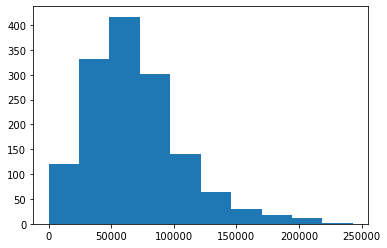

1.0170229723462332


In [12]:
plt.hist(df1['KM'])# As it has outlier so we take  log so that machine understand the data well.
plt.show()
print(df1.KM.skew())

In [13]:
df1['KM_new'] = np.sqrt(df1["KM"])
df1.drop(["KM"],axis =1, inplace = True)

In [14]:
print(df1.KM_new.skew()) # now see skewness reduced  drastically.
df1.head()

-0.11272039474713931


,Price,Age_08_04,HP,cc,Doors,Gears,Quarterly_Tax,Weight,KM_new
0,13500,23,90,2000,3,5,210,1165,216.762543
1,13750,23,90,2000,3,5,210,1165,270.068510
2,13950,24,90,2000,3,5,210,1165,204.232710
3,14950,26,90,2000,3,5,210,1165,219.089023
4,13750,30,90,2000,3,5,210,1170,196.214169


In [15]:
print(df1.Weight.skew())

3.1165183382777437


In [16]:
print(np.log2(df1["Weight"]).skew()) # As by taking log it skewness doe not reduces so  we leave as it is.
Weight_new = np.log(df1["Weight"]).skew() 

2.438887243840107


In [17]:
df1['Weight_new'] = np.sqrt(df1["Weight"])
df1.drop(["Weight"],axis =1, inplace = True)

In [18]:
print(df1.Price.skew())
np.log(df1.Price).skew()

1.6965785809803777


0.7280863930236549

In [19]:
Price_new = np.log(df1.Price)

In [20]:
df1['Price_new'] = np.log(df1.Price)
df1.drop(["Price"],axis =1, inplace = True)

In [21]:
print(df1.cc.skew())
np.log(df1.cc).skew()

27.45219619846663


3.9523198105154385

In [22]:
df1['cc_new'] = np.log(df1.cc)
df1.drop(["cc"],axis =1, inplace = True)

In [23]:
dict = {'Age_08_04':'Age','Quarterly_Tax':'QT','KM_new':'KM','Weight_new':'Weight','Price_new':'Price','cc_new':'CC'}
df1.rename(columns = dict, inplace = True)

In [24]:
print(df1.shape)
df1.sample(5)


(1435, 9)


,Age,HP,Doors,Gears,QT,KM,Weight,Price,CC
121,19,90,5,5,234,226.050879,35.425979,9.900984,7.600902
1222,79,110,5,5,85,291.489279,32.710854,9.017968,7.377759
1284,70,110,5,5,85,270.211029,32.787193,9.099409,7.377759
858,62,110,5,5,85,254.552549,32.787193,8.986572,7.377759
927,67,86,4,5,69,236.799493,31.622777,9.132379,7.170120


In [25]:
df1.describe()

,Age,HP,Doors,Gears,QT,KM,Weight,Price,CC
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,55.980488,101.491986,4.032753,5.026481,87.020209,251.311052,32.736689,9.233079,7.351293
std,18.563312,14.981408,0.952667,0.188575,40.959588,73.609196,0.772465,0.295393,0.132339
min,1.000000,69.000000,2.000000,3.000000,19.000000,1.000000,31.622777,8.377931,7.170120
25%,44.000000,90.000000,3.000000,5.000000,69.000000,207.364414,32.249031,9.041922,7.244228
50%,61.000000,110.000000,4.000000,5.000000,85.000000,251.894819,32.710854,9.200290,7.377759
75%,70.000000,110.000000,5.000000,5.000000,85.000000,295.027956,32.939338,9.388487,7.377759
max,80.000000,192.000000,5.000000,6.000000,283.000000,492.950302,40.187063,10.388995,9.680344


In [26]:
df1.skew()

Age      -0.825567
HP        0.957833
Doors    -0.075056
Gears     2.282921
QT        1.995336
KM       -0.112720
Weight    2.754845
Price     0.728086
CC        3.952320
dtype: float64

# Model :-

In [27]:
import statsmodels.formula.api as smf
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df1).fit()

In [28]:
print(model.params, model.pvalues)

Intercept    8.629549
Age         -0.010181
KM          -0.000927
HP           0.003175
CC          -0.127605
Doors        0.009602
Gears        0.062926
QT           0.000733
Weight       0.048983
dtype: float64 Intercept    1.009392e-175
Age          8.385920e-257
KM            4.378404e-52
HP            2.962429e-34
CC            1.107403e-04
Doors         6.086305e-03
Gears         2.486277e-04
QT            1.684162e-09
Weight        3.939377e-13
dtype: float64


In [29]:
model.rsquared , model.rsquared_adj

(0.8450042626534285, 0.8441347213499415)

## Model Validation Techniques

In [30]:
# Technique 1:- 
# Check for Colliniarity
X = df1.drop(columns= ["Price"])
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,19.582728,Age
1,62.249639,HP
2,22.038736,Doors
3,700.622350,Gears
4,8.955815,QT
5,24.508151,KM
6,3882.422983,Weight
7,3963.245864,CC


In [31]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=df1).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=df1).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=df1).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=df1).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df


,Variables,Vif
0,Age,2.071244
1,KM,1.962125
2,HP,1.518746
3,CC,2.000822
4,Doors,1.168908
5,Gears,1.100518
6,QT,2.585058
7,Weight,2.812241


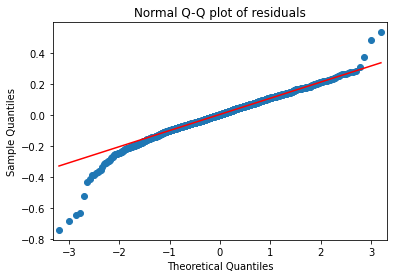

In [32]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)# model.resid == df1.Price.values - model.predict()
import statsmodels.api as sm
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [33]:
list(np.where(model.resid>0.4))

[array([ 522, 1057], dtype=int64)]

In [34]:
list(np.where(model.resid<-0.4))

[array([ 190,  191,  392,  401,  600, 1381, 1434], dtype=int64)]

-0.7119968765456585

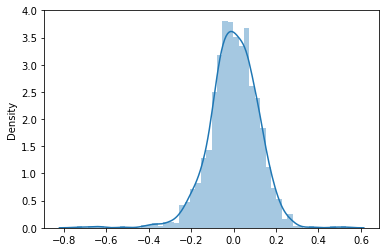

In [35]:
sns.distplot(model.resid)
model.resid.skew()

In [36]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x = mm.fit_transform(model.predict())
y = mm.fit_transform(model.resid)


ValueError: Expected 2D array, got 1D array instead:
array=[9.67948462 9.63005038 9.68092375 ... 9.0984102  9.10894682 9.27412557].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

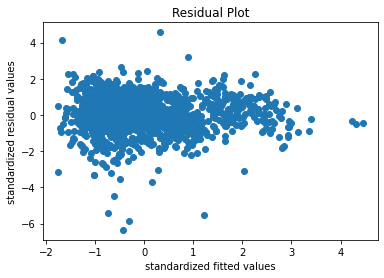

In [37]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid)) # [model.predict() == model.fittedvalues]
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

# Defining Target And Feature from the Data:-

In [65]:
# We have to predict the price so  it must be our TARGET:-
y = df1.Price # TARGET
X = df1.drop(columns = "Price") # FEATURE

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif
# show there is a lot multicoliniarity problem.

,VIF Factor,features
0,19.582728,Age
1,62.249639,HP
2,22.038736,Doors
3,700.622350,Gears
4,8.955815,QT
5,24.508151,KM
6,3882.422983,Weight
7,3963.245864,CC


In [42]:

vif_GR
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=df1).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=df1).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=df1).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,2.071244
1,KM,1.962125
2,HP,1.518746
3,CC,2.000822
4,Doors,1.168908
5,Gears,1.100518
6,QT,2.585058
7,Weight,2.812241


In [43]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

eval_env: 1


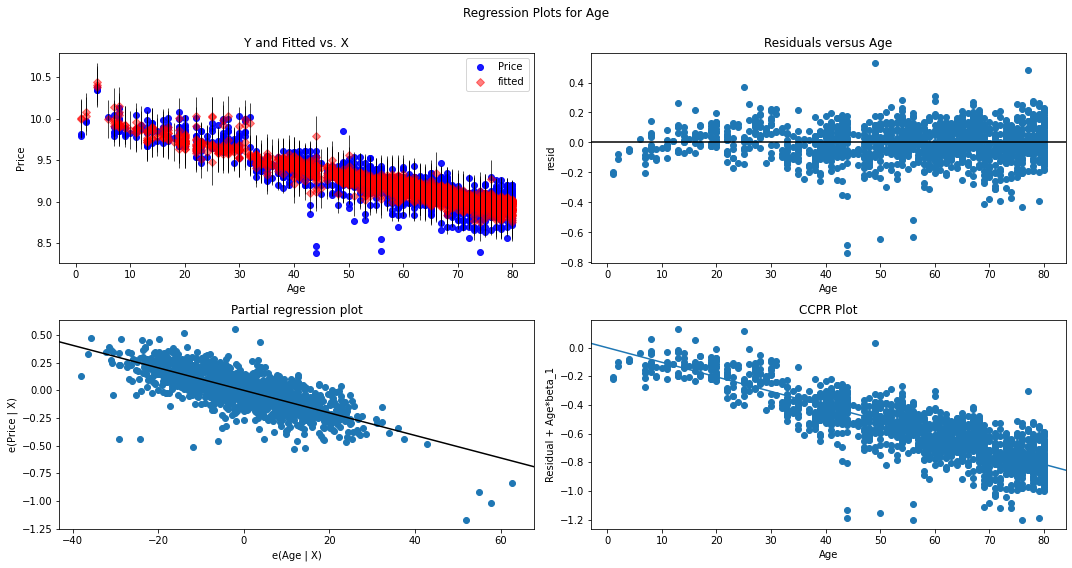

In [44]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


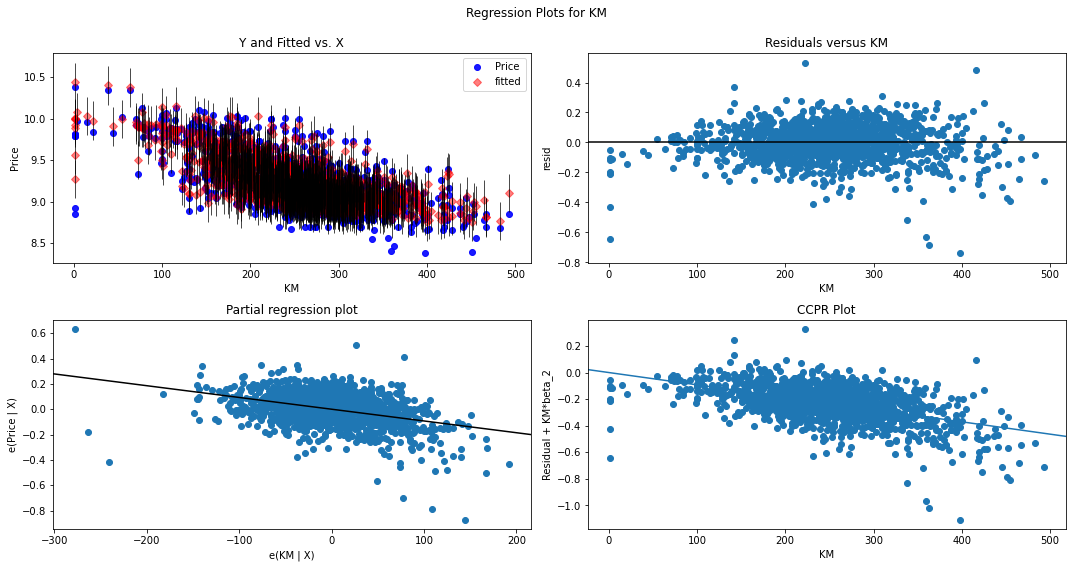

In [45]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


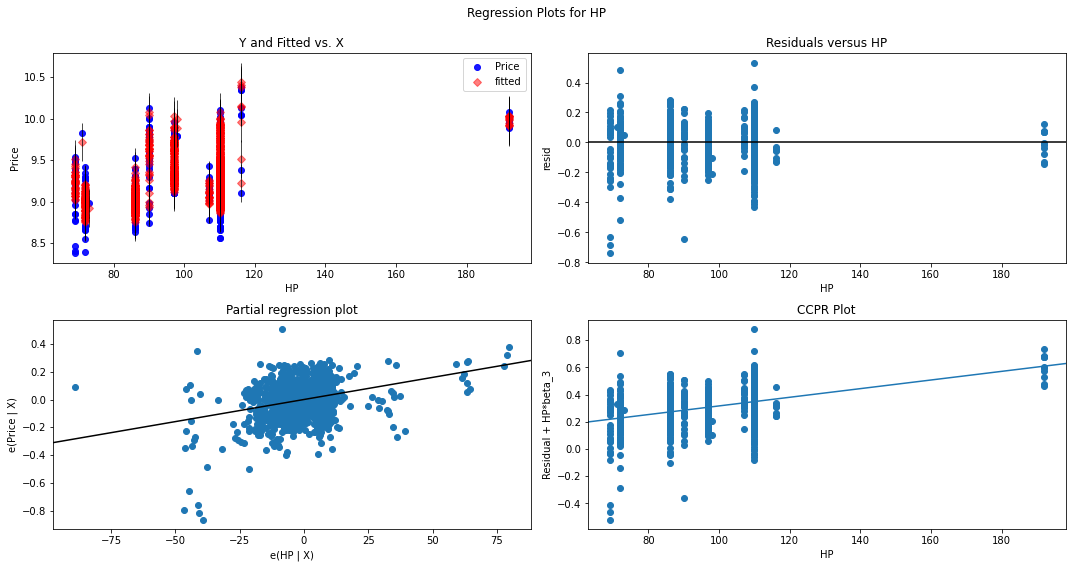

In [46]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


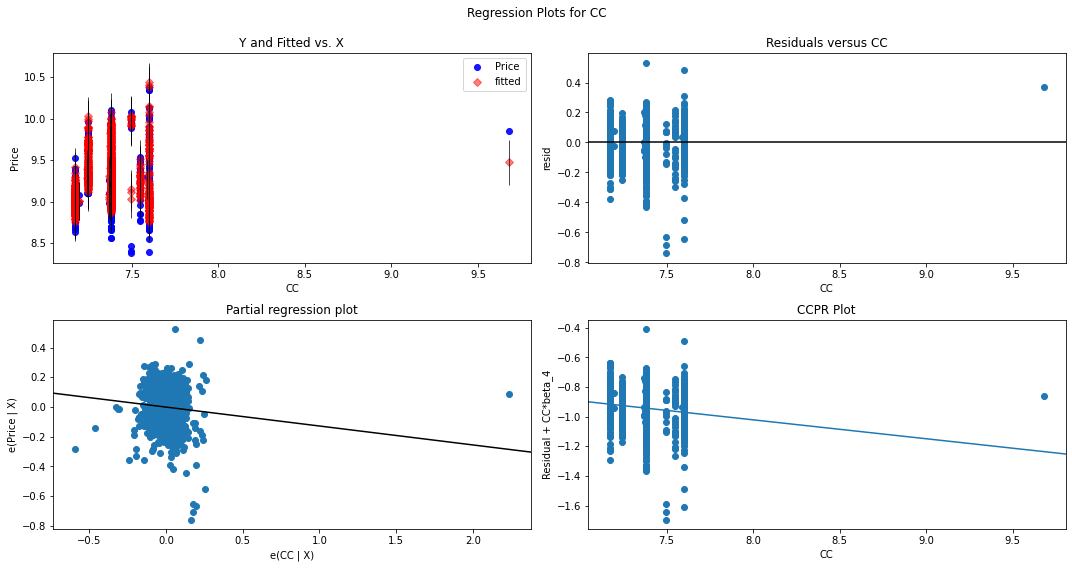

In [47]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

eval_env: 1


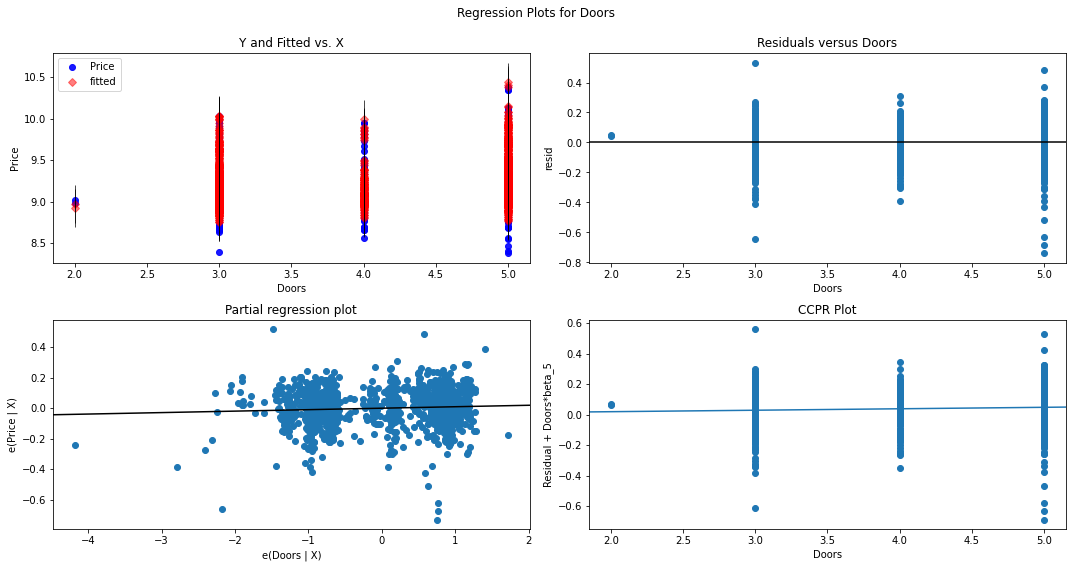

In [48]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


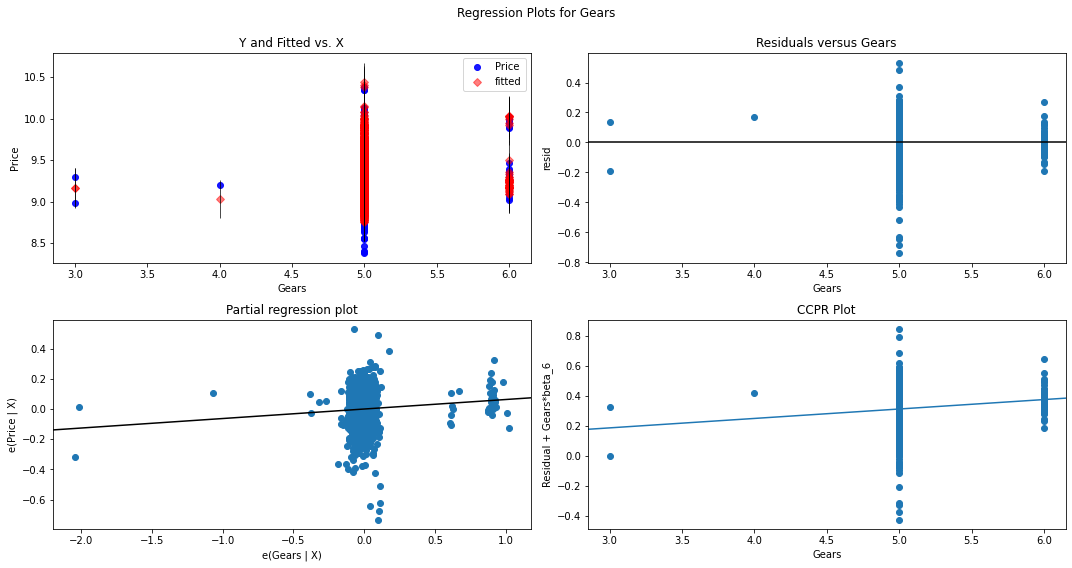

In [49]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


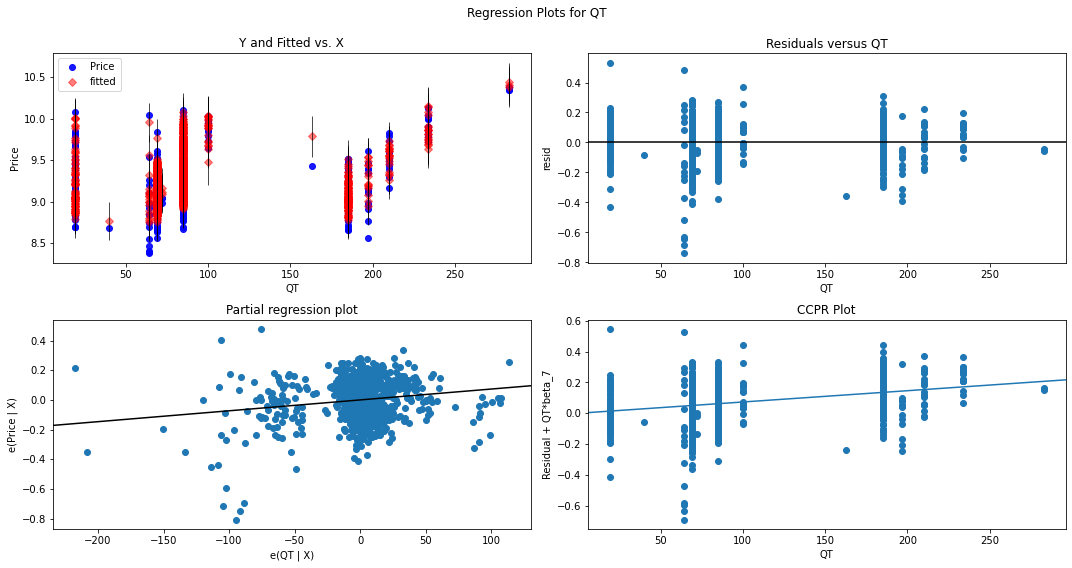

In [50]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

eval_env: 1


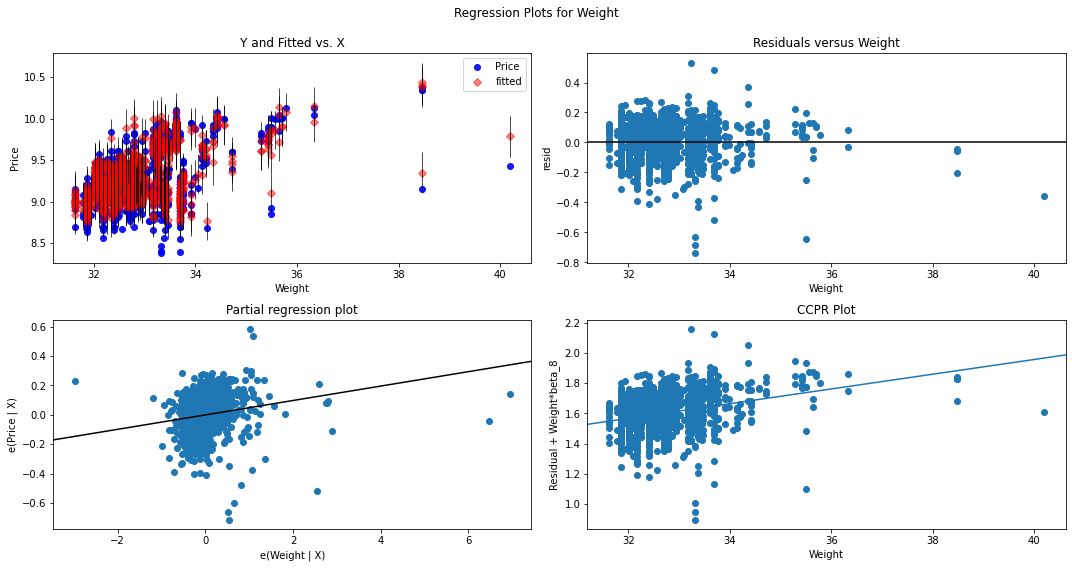

In [51]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)
# Two Techniques : 1. Cook's Distance & 2. Leverage value

In [52]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([0.00245575, 0.00087454, 0.00165433, ..., 0.00018131, 0.00336272,
       0.04408767])

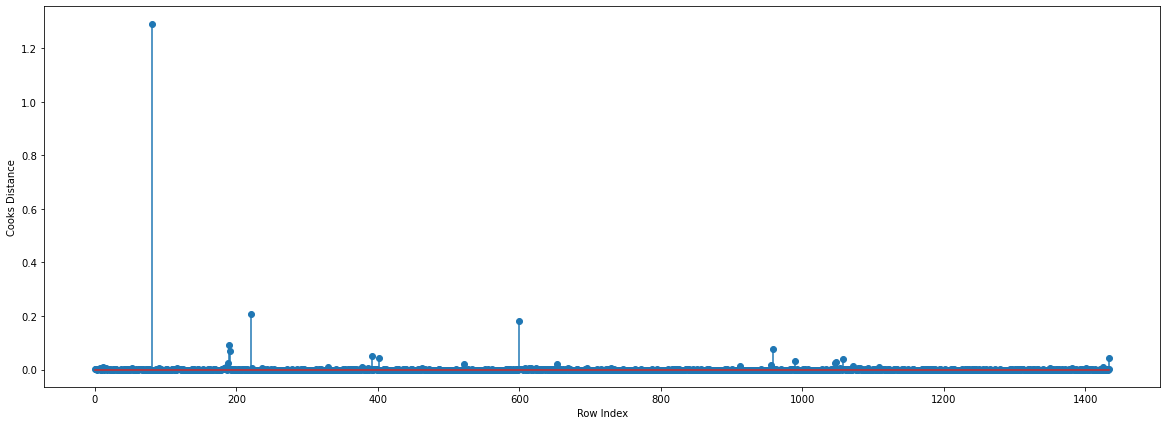

In [53]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [54]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 1.2923541447457858)

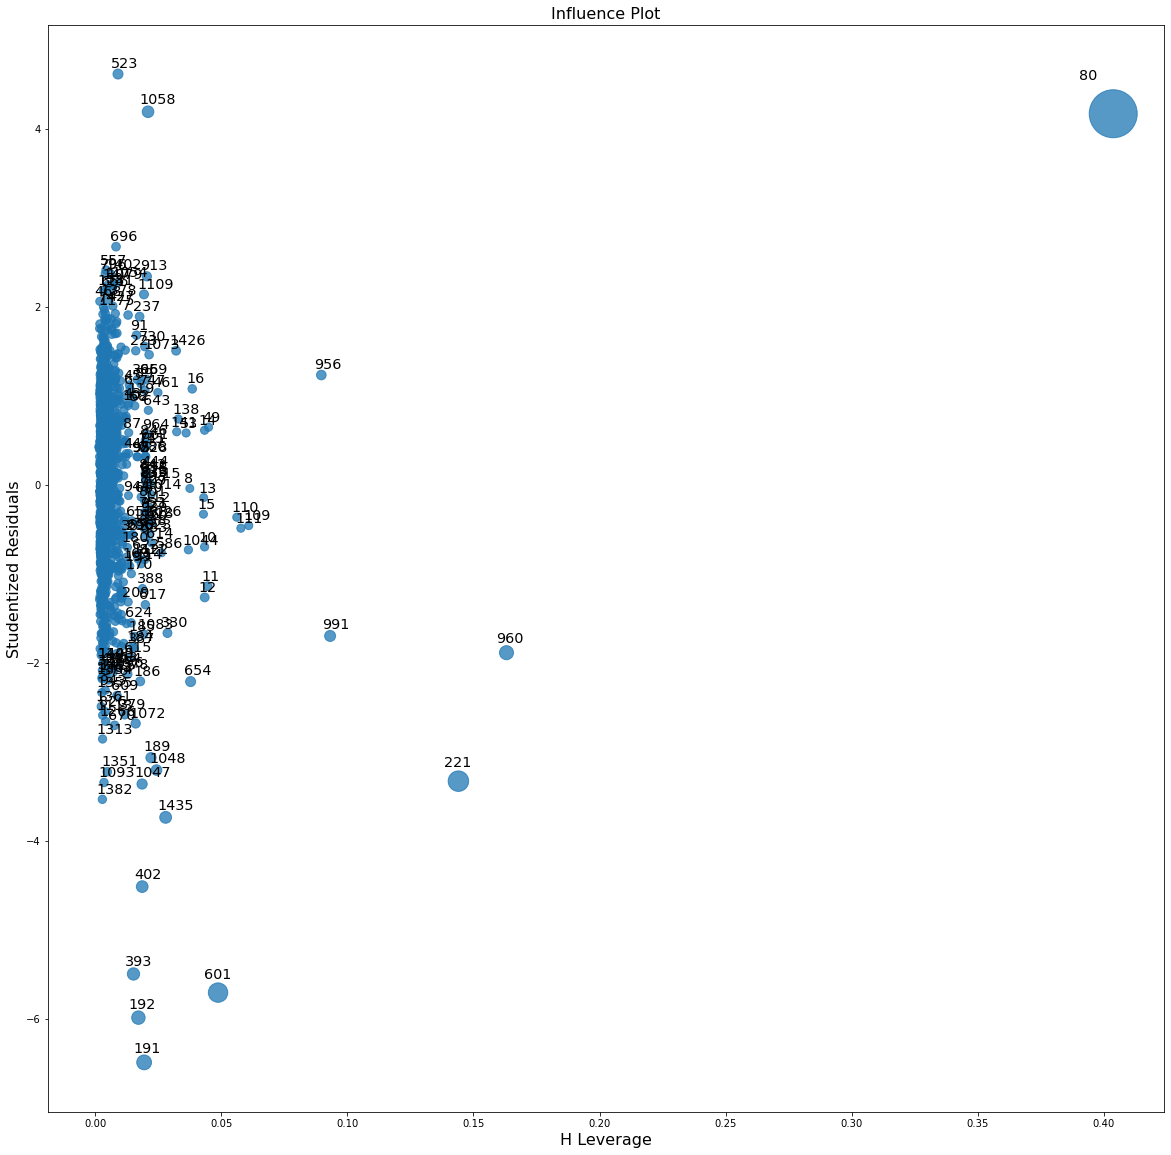

In [55]:
from statsmodels.graphics.regressionplots import influence_plot
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [56]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=df1.shape[1]
n=df1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [57]:
df1[df1.index.isin([80])] 

,Age,HP,Doors,Gears,QT,KM,Weight,Price,CC
80,25,110,5,5,100,141.488515,34.351128,9.849559,9.680344


# Improving the Model:-

In [58]:
# Creating a copy of data so that original dataset is not affected
toyo_new=df1.copy()
toyo_new

,Age,HP,Doors,Gears,QT,KM,Weight,Price,CC
0,23,90,3,5,210,216.762543,34.132096,9.510445,7.600902
1,23,90,3,5,210,270.068510,34.132096,9.528794,7.600902
2,24,90,3,5,210,204.232710,34.132096,9.543235,7.600902
3,26,90,3,5,210,219.089023,34.132096,9.612467,7.600902
4,30,90,3,5,210,196.214169,34.205263,9.528794,7.600902
5,32,90,3,5,210,246.981781,34.205263,9.468851,7.600902
6,27,90,3,5,210,307.590637,35.284558,9.735069,7.600902
7,30,90,3,5,210,275.479582,35.284558,9.830917,7.600902
8,27,192,3,5,100,140.356688,34.423829,9.975808,7.495542
9,23,69,3,5,185,266.717079,33.241540,9.468851,7.549609


In [59]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
toyo5=toyo_new.drop(toyo_new.index[[80]],axis=0).reset_index(drop=True)
toyo5


,Age,HP,Doors,Gears,QT,KM,Weight,Price,CC
0,23,90,3,5,210,216.762543,34.132096,9.510445,7.600902
1,23,90,3,5,210,270.068510,34.132096,9.528794,7.600902
2,24,90,3,5,210,204.232710,34.132096,9.543235,7.600902
3,26,90,3,5,210,219.089023,34.132096,9.612467,7.600902
4,30,90,3,5,210,196.214169,34.205263,9.528794,7.600902
5,32,90,3,5,210,246.981781,34.205263,9.468851,7.600902
6,27,90,3,5,210,307.590637,35.284558,9.735069,7.600902
7,30,90,3,5,210,275.479582,35.284558,9.830917,7.600902
8,27,192,3,5,100,140.356688,34.423829,9.975808,7.495542
9,23,69,3,5,185,266.717079,33.241540,9.468851,7.549609


# Model Deletion Diagnostics and Final Model

In [70]:
 while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo5).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyo5=toyo5.drop(toyo5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyo5
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo5).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)


Thus model accuracy is improved to 0.8479823395354846


In [71]:

final_model.rsquared

0.8479823395354846

In [72]:
toyo5

,Age,HP,Doors,Gears,QT,KM,Weight,Price,CC
0,23,90,3,5,210,216.762543,34.132096,9.510445,7.600902
1,23,90,3,5,210,270.068510,34.132096,9.528794,7.600902
2,24,90,3,5,210,204.232710,34.132096,9.543235,7.600902
3,26,90,3,5,210,219.089023,34.132096,9.612467,7.600902
4,30,90,3,5,210,196.214169,34.205263,9.528794,7.600902
5,32,90,3,5,210,246.981781,34.205263,9.468851,7.600902
6,27,90,3,5,210,307.590637,35.284558,9.735069,7.600902
7,30,90,3,5,210,275.479582,35.284558,9.830917,7.600902
8,27,192,3,5,100,140.356688,34.423829,9.975808,7.495542
9,23,69,3,5,185,266.717079,33.241540,9.468851,7.549609


# Model Predictions

In [73]:
# say New data for prediction is
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [74]:
# Manual Prediction of Price
final_model.predict(new_data)

0   -315.926989
dtype: float64

In [75]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(toyo5)
pred_y

0        9.671657
1        9.625324
2        9.672521
3        9.639554
4        9.624176
5        9.559995
6        9.628955
7        9.626784
8       10.006187
9        9.489849
10      10.053009
11      10.055747
12      10.051235
13      10.015198
14       9.976411
15      10.058114
16       9.937832
17       9.688506
18       9.581988
19       9.535926
20       9.530342
21       9.660773
22       9.585055
23       9.635363
24       9.641707
25       9.674856
26       9.639859
27       9.604469
28       9.608766
29       9.679794
30       9.612101
31       9.660451
32       9.624075
33       9.626258
34       9.647526
35       9.603177
36       9.656011
37       9.726577
38       9.584921
39       9.629250
40       9.631005
41       9.590925
42       9.635166
43       9.651993
44       9.715729
45       9.742977
46       9.695918
47       9.610349
48       9.757358
49       9.950023
50       9.773400
51       9.560573
52       9.691928
53       9.958664
54       9.700409
55       9

# Scaling the DataFrame:-

In [62]:
y

0        9.510445
1        9.528794
2        9.543235
3        9.612467
4        9.528794
5        9.468851
6        9.735069
7        9.830917
8        9.975808
9        9.468851
10       9.949894
11       9.900984
12       9.883285
13       9.975808
14      10.021271
15       9.998798
16      10.032320
17       9.795345
18       9.726154
19       9.738023
20       9.677214
21       9.738023
22       9.677214
23       9.738023
24       9.695848
25       9.677214
26       9.769670
27       9.664596
28       9.738023
29       9.795345
30       9.468851
31       9.664596
32       9.677214
33       9.612467
34       9.648595
35       9.664596
36       9.677214
37       9.612467
38       9.664596
39       9.598998
40       9.543235
41       9.726154
42       9.543235
43       9.738023
44       9.738023
45       9.852194
46       9.795345
47       9.667765
48       9.795345
49       9.996522
50       9.795345
51       9.664596
52       9.928180
53       9.996522
54       9.648595
55       9

In [76]:
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import minmax_scale
# Making the objecct
mm = MinMaxScaler()
#mm = mimmax_scale
#Scaling
X_scaled = mm.fit_transform(X)
Y_scaled = mm.fit_transform(y.values.reshape(-1,1))

# Preparing The Model:-

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled ,y , test_size = 0.2 ,random_state =42)

In [79]:
y_train.head()

1128    8.922658
899     9.159047
1188    8.980927
311     9.546455
1145    8.771835
Name: Price, dtype: float64

In [80]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7
0,0.974684,0.333333,1.0,0.666667,0.250000,0.669884,0.127048,0.082717
1,0.772152,0.138211,1.0,0.666667,0.189394,0.492947,0.064061,0.000000
2,0.886076,0.138211,1.0,0.666667,0.189394,0.609037,0.064061,0.000000
3,0.544304,0.333333,1.0,0.666667,0.250000,0.396615,0.144855,0.082717
4,0.936709,0.333333,1.0,0.666667,0.250000,0.646706,0.127048,0.082717


# Model Prepartion:-

In [81]:
from sklearn.linear_model import LinearRegression
#
# Making Object
lr = LinearRegression()
lr.fit(X_train, y_train)# Model  is training.

#Prediction
y_pred = lr.predict(X_test)
y_pred

array([ 9.23005981,  9.20184832,  9.08626199,  9.12695628,  9.07613172,
        9.05093201,  9.08123736,  9.02594772,  9.34272588,  9.40525096,
        9.10625243,  9.11923081,  9.44793923,  9.41121261,  9.04818028,
        9.3335599 ,  9.39802979,  9.70202443,  9.20132477,  9.3442513 ,
        9.3500714 ,  9.88616834,  9.17189396,  9.24027777,  8.97686127,
        9.66616763,  8.95922844,  9.01036124,  9.62790526,  9.50660663,
        9.00645539,  9.20631267,  9.18631861,  9.17265852,  9.19100178,
        9.05357765,  9.09043707,  9.16129353,  9.68498177,  9.22653398,
        9.08216777,  9.12698814,  9.18987706,  9.03803357,  9.23107003,
        9.76210735,  9.19799974,  9.06065416,  9.25902486,  9.45510676,
        9.45495078,  8.88712301,  9.5435521 ,  9.68640552,  8.85908745,
        8.99981823,  9.28996284,  9.32086094,  9.65040763,  9.93488095,
        9.54240243,  8.98794007,  8.98323196,  9.42616072,  9.3817157 ,
        8.87654295,  9.42361501,  8.97874221,  9.02800279,  8.90

# Accuracy of Model:-

In [82]:
from sklearn.metrics import r2_score
r_sq = r2_score(y_test, y_pred)
r_sq

0.8419598869469375

# Intercept of Equation:-

In [83]:
lr.intercept_

9.707514771124208

# Coefficient of Eqation:-

In [84]:
lr.coef_

array([-0.79450518,  0.415983  ,  0.02451324,  0.15119425,  0.19186722,
       -0.46454283,  0.48098648, -0.36381823])